# Image Caption Generator using CNN, LSTM and Attention Mechanism



### Submitted by:

Name: Jatin Arora

Student No. 100885609

## Problem definition
In this project, I am creating an image caption generator. When an image is given to the model, it produces a caption describing the image in natural language. This has multiple use cases:


1.   Automatic ALT tag generation for website images which is beneficial for SEO.
2.   The caption can be connected to a text to speed model that can help describe an image to a visually challenged person.


## Data Collection
The data has been collected from Flickr30k dataset. The Flickr30K dataset is a widely used benchmark dataset for image captioning, consisting of 30,000 images with corresponding natural language descriptions. The dataset was created by gathering images from the Flickr website and crowdsourcing human annotations to create captions for each image. Each image in the dataset is accompanied by five human-written captions, resulting in a total of 150,000 captions.

## Model selection and implementation

### Model 1

We are implementing this problem by using a combination of CNN and LSTM. The pretrained model VGG16 is used to extract features of the images. The last prediction layer of the VGG16 model is removed and only the features are extracted. 

Caption data is used to create input seq data and output seq data. These are then passed to a LSTM model.

Both the features and output of LSTM model are combined to get the final model.

### Model 2

This is a modified version of the above model with attention mechanism proposed by Bahdanau. It takes the Dot product of both inputs and then used softmax activation to create the attention. After this image features are added to attention to create the context.

## Model evaluation and interpretation
The model is evaluated using BLEU score. It measures the similarity between the generated text and a set of reference texts, considering n-gram precision and brevity penalty. Higher BLEU scores indicate better quality. For this model, we are using the 1 gram and 2 gram BLUE score.

# Import Libraries


In [130]:
!pip install pandas
!pip install sklearn
!pip install keras
!pip install tensorflow
!pip install matplotlib
!pip install numpy
!pip install tqdm
!pip install scikit-learn
!pip install nltk


[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python3 -m pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 
import pickle
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.models import load_model
import sys

from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, Dropout, add, Concatenate, RepeatVector, Activation, Dot, Permute


In [48]:
import tarfile
my_tar = tarfile.open('Dataset/flickr30k-images.tar.gz')
my_tar.extractall('/Images') # specify which folder to extract to
my_tar.close()

In [2]:
#Mounting Dataset
DATASET_DIR = 'Dataset/'
WORKING_DIR = 'Working Directory'

# Extracting Image Features using VGG16



In [2]:
# Load VGG16 Model 
model = VGG16()
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [54]:
# Extracting features from images

features = {}
directory  = os.path.join(DATASET_DIR,'flickr30k-images')



for img_name in tqdm(os.listdir(directory)):
  img_path = directory + "/" + img_name
  image = load_img(img_path, target_size=(224,224))

  # convert image to numpy array
  image = img_to_array(image)

  #reshape data to model
  image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

  #preprocess the image for VGG16 Model
  image = preprocess_input(image)

  #extract features
  feature = model.predict(image, verbose=0)

  #get image ID
  img_id = img_name.split('.')[0]

  #store feature
  features[img_id] = feature


  0%|          | 0/31784 [00:00<?, ?it/s]

1000092795.jpg
10002456.jpg
1000268201.jpg
1000344755.jpg
1000366164.jpg
1000523639.jpg
1000919630.jpg
10010052.jpg
1001465944.jpg
1001545525.jpg
1001573224.jpg
1001633352.jpg
1001773457.jpg
1001896054.jpg
100197432.jpg
100207720.jpg
1002674143.jpg
1003163366.jpg
1003420127.jpg
1003428081.jpg
100444898.jpg
1005216151.jpg
100577935.jpg
1006452823.jpg
100652400.jpg
1007129816.jpg
100716317.jpg
1007205537.jpg
1007320043.jpg
100759042.jpg
10082347.jpg
10082348.jpg
100845130.jpg
10090841.jpg
1009434119.jpg
1009692167.jpg
101001624.jpg
1010031975.jpg
1010087179.jpg
1010087623.jpg
10101477.jpg
1010470346.jpg
1010673430.jpg
101093029.jpg
101093045.jpg
1011572216.jpg
1012150929.jpg
1012212859.jpg
1012328893.jpg
101262930.jpg
1013536888.jpg
101362133.jpg
101362650.jpg
1014609273.jpg
101471792.jpg
1014785440.jpg
1015118661.jpg
1015584366.jpg
101559400.jpg
1015712668.jpg
10160966.jpg
101654506.jpg
1016626169.jpg
101669240.jpg
1016887272.jpg
1017675163.jpg
1018057225.jpg
1018148011.jpg
101859883.jp

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7fdb900b9f90>

In [52]:
pickle.dump(features, open(os.path.join(WORKING_DIR, 'features.pkl'),'wb'))

In [3]:
with open(os.path.join(WORKING_DIR, 'features.pkl'), 'rb') as f:
  features = pickle.load(f)

In [4]:
len(features['1000919630'][0])

4096

# Load Captions

In [5]:
with open(os.path.join(DATASET_DIR, 'captions.txt'), 'r') as f:
  next(f)
  caption_doc = f.read()

In [6]:
# create mapping of image captions
mapping = {}

for line in tqdm(caption_doc.split('\n')):

  #Filtering out error samples
  if len(line) < 3:
    continue
    
  tokens = line.split(',')
  image_id, caption = tokens[0],tokens[2:]
  image_id = image_id.split('.')[0]
  caption = ",".join(caption)
  caption = caption.replace('"','')

  # mapping the captions to images
  if image_id not in mapping:
    mapping[image_id] = []
  mapping[image_id].append(caption)

  0%|          | 0/158911 [00:00<?, ?it/s]

In [7]:
mapping['1000919630']

['A man sits in a chair while holding a large stuffed animal of a lion .',
 'A man is sitting on a chair holding a large stuffed animal .',
 'A man completes the finishing touches on a stuffed lion .',
 'A man holds a large stuffed lion toy .',
 'A man is smiling at a stuffed lion']

In [8]:
mapping['1001633352']

['Three young men and a young woman wearing sneakers are leaping in midair at the top of a flight of concrete stairs .',
 'Four casually dressed guys jumping down a stairway outdoors with a stone wall behind them .',
 'Four guys three wearing hats one not are jumping at the top of a staircase .',
 'Four men with excited faces are jumping down from the top of stairs .',
 'Four people are jumping from the top of a flight of stairs .']

In [9]:
# Total number of images
len(mapping)

31782

# Preprocessing Text Data

In [10]:
def clean(mapping):
    for key, captions in mapping.items():
        for i in range(len(captions)):
          caption = captions[i]

          # convert to lowercase
          caption = caption.lower()

          # delete digits, special chars, etc., 
          caption = caption.replace('[^A-Za-z]', '')

          # delete additional spaces
          caption = caption.replace('\s+', ' ')
          
          # add start and end tags to the caption
          caption = 'startseq ' + " ".join([word for word in caption.split() if len(word)>1]) + ' endseq'
          captions[i] = caption

In [11]:
# before preprocess of text
mapping['1000919630']

['A man sits in a chair while holding a large stuffed animal of a lion .',
 'A man is sitting on a chair holding a large stuffed animal .',
 'A man completes the finishing touches on a stuffed lion .',
 'A man holds a large stuffed lion toy .',
 'A man is smiling at a stuffed lion']

In [12]:
# preprocess the text
clean(mapping)

In [13]:
# after preprocess of text
mapping['1000919630']

['startseq man sits in chair while holding large stuffed animal of lion endseq',
 'startseq man is sitting on chair holding large stuffed animal endseq',
 'startseq man completes the finishing touches on stuffed lion endseq',
 'startseq man holds large stuffed lion toy endseq',
 'startseq man is smiling at stuffed lion endseq']

In [14]:
# creating a list of all captions
all_captions = []
for key in mapping:
    for caption in mapping[key]:
        all_captions.append(caption)
len(all_captions)

158910

In [15]:
# tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_captions)
vocab_size = len(tokenizer.word_index) + 1
vocab_size

18319

In [16]:
# get maximum length of the caption available that will be useful for padding
max_length = max(len(caption.split()) for caption in all_captions)
max_length

74

# Train Test Split


In [17]:
# Splitting the data
image_ids = list(mapping)
train, test = train_test_split(image_ids, test_size=0.20, random_state=1)

In [18]:
# create data generator to get data in batch (avoids session crash)

def data_generator(data_keys, mapping, features, tokenizer, max_length, vocab_size, batch_size):
    # loop over images
    X1, X2, y = list(), list(), list()
    n = 0
    while 1:
        for key in data_keys:
            n += 1
            captions = mapping[key]

            # process each caption
            for caption in captions:

                # encode the sequence
                seq = tokenizer.texts_to_sequences([caption])[0]
                
                # split the sequence into X, y pairs
                for i in range(1, len(seq)):

                    # split into input and output pairs
                    in_seq, out_seq = seq[:i], seq[i:]

                    # pad input sequence
                    in_seq = pad_sequences([in_seq], maxlen=max_length)[0]

                    # encode output sequence
                    out_seq = to_categorical(out_seq, num_classes=vocab_size)[0]

                    # store the sequences
                    X1.append(features[key][0])
                    X2.append(in_seq)
                    y.append(out_seq)                            
                    
            if n == batch_size:
                X1, X2, y = np.array(X1), np.array(X2),np.array(y)
                yield [X1, X2], y
                X1, X2, y = list(), list(), list()
                n = 0

# Simple Encoder Decoder Model 


In [69]:
def simple_encoder_decoder_model(vocab_size, max_length, img_feature_dim=4096):
  # Encoder model

  # image feature layers
  inputs1 = Input(shape=(img_feature_dim,))
  fe1 = Dropout(0.4)(inputs1)
  fe2 = Dense(256, activation='relu')(fe1)
  fe3 = RepeatVector(max_length)(fe2)


  # sequence feature layers
  inputs2 = Input(shape=(max_length,))
  se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
  se2 = Dropout(0.4)(se1)
  se3 = LSTM(256, return_sequences=True)(se2)

  # Decoder model
  conca = Concatenate()([fe3, se3])
  decoder2 = LSTM(256, return_sequences=False)(conca)
  outputs = Dense(vocab_size, activation='softmax')(decoder2)

  # compiling the model
  model = Model(inputs=[inputs1, inputs2], outputs=outputs)

  return model

In [70]:
model1 = simple_encoder_decoder_model(vocab_size, max_length)
model1.compile(optimizer='Adam', loss='categorical_crossentropy')
model1.summary()
# plot the model
# plot_model(model, show_shapes=True)

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 4096)]       0           []                               
                                                                                                  
 input_11 (InputLayer)          [(None, 74)]         0           []                               
                                                                                                  
 dropout_8 (Dropout)            (None, 4096)         0           ['input_10[0][0]']               
                                                                                                  
 embedding_4 (Embedding)        (None, 74, 256)      4689664     ['input_11[0][0]']               
                                                                                            

In [24]:
import gc
gc.collect()

history2 = []
history =[]

In [20]:
# Train the model
epochs = 8
batch_size = 64
steps = len(train) // batch_size
val_steps = len(test) // batch_size

history1 = model1.fit(
    data_generator(train, mapping, features, tokenizer, max_length, vocab_size, batch_size),
    validation_data = data_generator(test, mapping, features, tokenizer, max_length, vocab_size, batch_size),
    epochs=epochs,
    steps_per_epoch=steps,
    verbose=1,
    validation_steps=val_steps
)

Epoch 1/8
397/397 [==============================] - 255s 630ms/step - loss: 3.4926 - val_loss: 3.7026
Epoch 2/8
397/397 [==============================] - 239s 603ms/step - loss: 3.4221 - val_loss: 3.6734
Epoch 3/8
397/397 [==============================] - 239s 604ms/step - loss: 3.3605 - val_loss: 3.6498
Epoch 4/8
397/397 [==============================] - 238s 600ms/step - loss: 3.3041 - val_loss: 3.6313
Epoch 5/8
397/397 [==============================] - 241s 608ms/step - loss: 3.2531 - val_loss: 3.6188
Epoch 6/8
397/397 [==============================] - 240s 606ms/step - loss: 3.2072 - val_loss: 3.6091
Epoch 7/8
397/397 [==============================] - 239s 604ms/step - loss: 3.1644 - val_loss: 3.6006
Epoch 8/8
397/397 [==============================] - 240s 606ms/step - loss: 3.1245 - val_loss: 3.5954


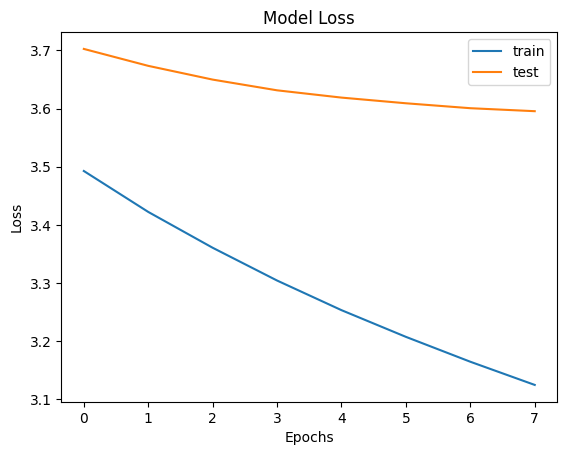

In [39]:
plt.plot(history1.history['loss'], label='train')
plt.plot(history1.history['val_loss'], label='test')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [21]:
# save the model
model1.save(WORKING_DIR+'/modelV1_30k_v1.h5')

In [19]:
model1 = load_model(WORKING_DIR+'/modelV1_30k_v1.h5')

# Encoder Decoder with Attention Mechanism Model 



In [31]:
def attention_model(vocab_size, max_length, img_feature_dim=4096):

    # Image features
    inputs1 = Input(shape=(img_feature_dim,))
    fe1 = Dropout(0.4)(inputs1)
    fe2 = Dense(256, activation='relu')(fe1)
    fe3 = RepeatVector(max_length)(fe2)

    # Sequence features
    inputs2 = Input(shape=(max_length,))
    se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
    se2 = Dropout(0.4)(se1)
    se3 = LSTM(256, return_sequences=True)(se2)

    # Attention mechanism
    attention = Dot(axes=2)([se3, fe3])
    attention = Activation('softmax')(attention)

    context = Dot(axes=1)([attention, fe3])
    decoder1 = Concatenate()([context, se3])

    # Fully connected layers
    lstm = LSTM(256, return_sequences=False)(decoder1)
    decoder2 = Dense(512, activation='relu')(lstm)
    outputs = Dense(vocab_size, activation='softmax')(decoder2)

    # Combine the encoder and decoder
    model = Model(inputs=[inputs1, inputs2], outputs=outputs)

    return model

In [32]:
model2 = attention_model(vocab_size, max_length)
model2.compile(optimizer='adam', loss='categorical_crossentropy')
model2.summary()

# plot the model
# plot_model(model2, show_shapes=True)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 74)]         0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 4096)]       0           []                               
                                                                                                  
 embedding_1 (Embedding)        (None, 74, 256)      4689664     ['input_4[0][0]']                
                                                                                                  
 dropout_2 (Dropout)            (None, 4096)         0           ['input_3[0][0]']                
                                                                                            

In [33]:
# Train the model
epochs = 13
batch_size = 64
steps = len(train) // batch_size
val_steps = len(test) // batch_size

history2 = model2.fit(
    data_generator(train, mapping, features, tokenizer, max_length, vocab_size, batch_size),
    validation_data = data_generator(test, mapping, features, tokenizer, max_length, vocab_size, batch_size),
    epochs=epochs,
    steps_per_epoch=steps,
    verbose=1,
    validation_steps=val_steps
)

Epoch 1/13
397/397 [==============================] - 266s 655ms/step - loss: 6.0679 - val_loss: 5.8023
Epoch 2/13
397/397 [==============================] - 253s 639ms/step - loss: 5.6617 - val_loss: 5.4987
Epoch 3/13
397/397 [==============================] - 250s 630ms/step - loss: 4.8012 - val_loss: 4.2582
Epoch 4/13
397/397 [==============================] - 247s 624ms/step - loss: 4.0197 - val_loss: 3.9420
Epoch 5/13
397/397 [==============================] - 248s 626ms/step - loss: 3.7260 - val_loss: 3.8264
Epoch 6/13
397/397 [==============================] - 250s 630ms/step - loss: 3.5558 - val_loss: 3.7774
Epoch 7/13
397/397 [==============================] - 248s 626ms/step - loss: 3.4330 - val_loss: 3.7538
Epoch 8/13
397/397 [==============================] - 246s 619ms/step - loss: 3.3349 - val_loss: 3.7504
Epoch 9/13
397/397 [==============================] - 247s 622ms/step - loss: 3.2538 - val_loss: 3.7453
Epoch 10/13
397/397 [==============================] - 250s 631m

KeyboardInterrupt: 

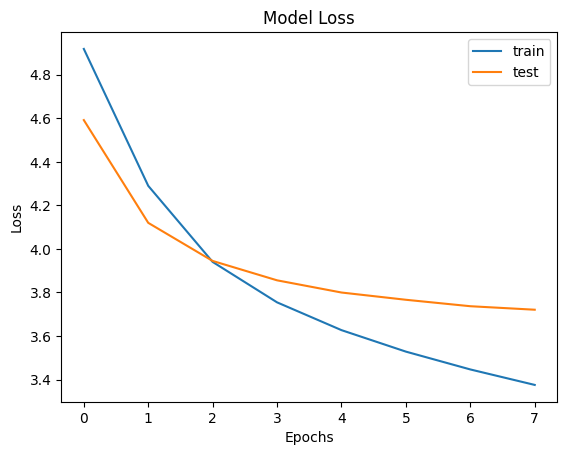

In [124]:
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='test')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [34]:
# save the model
model2.save(WORKING_DIR+'/modelV2_30k_v2.h5')

In [ ]:
model2 = load_model(WORKING_DIR+'/modelV2_30k_v1.h5')

# Generate Captions for the Image


In [25]:
def idx_to_word(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

In [26]:
# generate caption for an image
def predict_caption(model, image, tokenizer, max_length):

    # add start tag for generation process
    in_text = 'startseq'

    # iterate over the max length of sequence
    for i in range(max_length):
      
        # encode input sequence
        sequence = tokenizer.texts_to_sequences([in_text])[0]

        # pad the sequence
        sequence = pad_sequences([sequence], max_length)

        # predict next word
        yhat = model.predict([image, sequence], verbose=0)

        # get index with high probability
        yhat = np.argmax(yhat)

        # convert index to word
        word = idx_to_word(yhat, tokenizer)

        # stop if word not found
        if word is None:
            break
            
        # append word as input for generating next word
        in_text += " " + word

        # stop if we reach end tag
        if word == 'endseq':
            break
      
    return in_text

# Evaluate the model

In [40]:
from nltk.translate.bleu_score import corpus_bleu, SmoothingFunction

# validate with test data
actual, predicted_model1, predicted_model2 = list(), list(), list()

for key in tqdm(test[0:1000]):

    # get actual caption
    captions = mapping[key]

    # predict the caption for image
    y_pred_model1 = predict_caption(model1, features[key], tokenizer, max_length) 
    y_pred_model2 = predict_caption(model2, features[key], tokenizer, max_length)

    # split into words
    actual_captions = [caption.split() for caption in captions]
    
    y_pred_model1 = y_pred_model1.split()
    y_pred_model2 = y_pred_model2.split()

    # append to the list
    actual.append(actual_captions)
    predicted_model1.append(y_pred_model1)
    predicted_model2.append(y_pred_model2)
    
# calcuate BLEU score. It measures the similarity between the generated text and a set of reference texts, 
# considering n-gram precision and brevity penalty. Higher BLEU scores indicate better quality.

smooth = SmoothingFunction().method1

print("--------------Model 1------------------")
print("BLEU-1: %f" % corpus_bleu(actual, predicted_model1, weights=(1.0, 0, 0, 0), smoothing_function=smooth)) #one-gram
print("BLEU-2: %f" % corpus_bleu(actual, predicted_model1, weights=(0.5, 0.5, 0, 0), smoothing_function=smooth)) #two-gram
print('\n')

print("--------------Model 2------------------")
print("BLEU-1: %f" % corpus_bleu(actual, predicted_model2, weights=(1.0, 0, 0, 0), smoothing_function=smooth)) #one-gram
print("BLEU-2: %f" % corpus_bleu(actual, predicted_model2, weights=(0.5, 0.5, 0, 0), smoothing_function=smooth)) #two-gram

  0%|          | 0/1000 [00:00<?, ?it/s]

--------------Model 1------------------
BLEU-1: 0.583201
BLEU-2: 0.345204


--------------Model 2------------------
BLEU-1: 0.575269
BLEU-2: 0.332255


In [48]:
smooth = SmoothingFunction().method1

print("--------------Model 1------------------")
print("BLEU-3: %f" % corpus_bleu(actual, predicted_model1, weights=(0.5, 0.3, 0.2, 0), smoothing_function=smooth)) #one-gram
print("BLEU-4: %f" % corpus_bleu(actual, predicted_model1, weights=(0.4, 0.2, 0.2, 0.2), smoothing_function=smooth)) #two-gram
print('\n')

print("--------------Model 2------------------")
print("BLEU-3: %f" % corpus_bleu(actual, predicted_model2, weights=(0.5, 0.3, 0.2, 0), smoothing_function=smooth)) #one-gram
print("BLEU-4: %f" % corpus_bleu(actual, predicted_model2, weights=(0.4, 0.2, 0.2, 1), smoothing_function=smooth)) #two-gram

--------------Model 1------------------
BLEU-3: 0.289414
BLEU-4: 0.175465


--------------Model 2------------------
BLEU-3: 0.278299
BLEU-4: 0.009136



# Visualize the Results


In [27]:
from PIL import Image
import matplotlib.pyplot as plt
def generate_caption(image_name):
    # load the image
    # image_name = "1001773457_577c3a7d70.jpg"
    image_id = image_name.split('.')[0]
    img_path = os.path.join(DATASET_DIR, "flickr30k-images", image_name)
    image = Image.open(img_path)
    captions = mapping[image_id]
    plt.imshow(image)

    print('---------------------Actual---------------------')
    for caption in captions:
        words = caption.split()
        words = words[1:-1]
        caption = " ".join(words)
        print("- " + caption)
    
    # predict the caption
        
    print('\n')
    print('--------------------Predicted Model 1--------------------')
    y_pred_model1 = predict_caption(model1, features[image_id], tokenizer, max_length)
    words = y_pred_model1.split()
    words = words[1:-1]
    y_pred_model1 = " ".join(words)
    print(y_pred_model1)
    print('\n')

    print('--------------------Predicted Model 2--------------------')
    y_pred_model2 = predict_caption(model2, features[image_id], tokenizer, max_length)
    words = y_pred_model2.split()
    words = words[1:-1]
    y_pred_model2 = " ".join(words)
    print(y_pred_model2)
    
    

---------------------Actual---------------------
- team of man and woman performing water gymnastics with the man holding the female partner high above his head in an inverted pose
- the strong male partner in the water dancing team held his female partner above his head while she posed acrobatically over his head
- man and woman are swimming in pool dancing together in the water
- two people are performing synchronized swimming routine
- man and woman are making an acrobatic pose in pool


--------------------Predicted Model 1--------------------
young boy in blue shorts is jumping into the air


--------------------Predicted Model 2--------------------
two men are in the water with their hands in the air


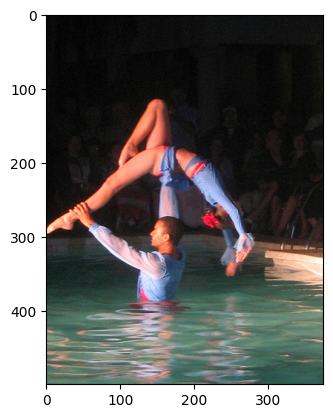

In [49]:
generate_caption("95903273.jpg")

---------------------Actual---------------------
- three young men and young woman wearing sneakers are leaping in midair at the top of flight of concrete stairs
- four casually dressed guys jumping down stairway outdoors with stone wall behind them
- four guys three wearing hats one not are jumping at the top of staircase
- four men with excited faces are jumping down from the top of stairs
- four people are jumping from the top of flight of stairs


--------------------Predicted Model 1--------------------
man in black shirt and black pants is standing in front of building


--------------------Predicted Model 2--------------------
man in blue shirt is standing on the roof of building


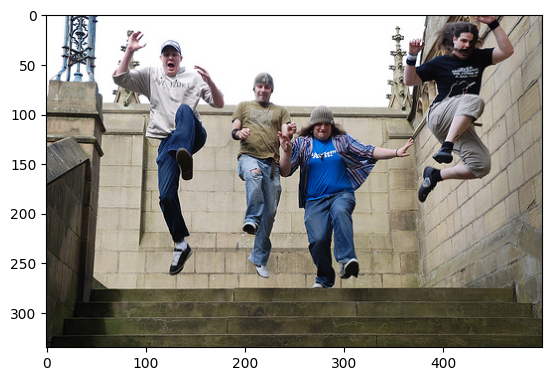

In [50]:
generate_caption("1001633352.jpg")

---------------------Actual---------------------
- the horses pull the carriage holding people and dog through the rain
- black and white horses carry cart with people through the rain
- cart containig two men being pulled by horses in the rain
- people enjoy horse draw open carriage in the rain
- horse driven carriage running through rainstorm


--------------------Predicted Model 1--------------------
man in blue shirt and black hat riding horse


--------------------Predicted Model 2--------------------
man in red shirt and cowboy hat is riding horse


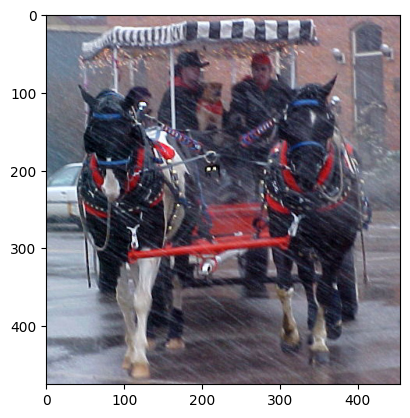

In [51]:
generate_caption("97731718.jpg")

# Test with Real Image

In [52]:
vgg_model = VGG16()
# restructure the model
vgg_model = Model(inputs=vgg_model.inputs, outputs=vgg_model.layers[-2].output)

-------Model 1 -------
woman with sunglasses on her face


-------Model 2 -------
woman in black dress is sitting on the floor




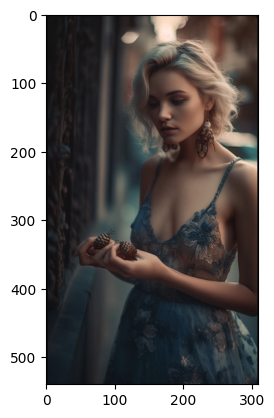

In [72]:
image_path = 'test2.png'

# load image
image = load_img(image_path, target_size=(224, 224))

# convert image pixels to numpy array
image = img_to_array(image)

# reshape data for model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

# preprocess image for vgg
image = preprocess_input(image)

# extract features
feature = vgg_model.predict(image, verbose=0)

# predict from the trained model
print("-------Model 1 -------")
y_pred =  predict_caption(model1, feature, tokenizer, max_length)
words = y_pred.split()
words = words[1:-1]
y_pred = " ".join(words)
print(y_pred)
print('\n')
image = Image.open(image_path)
print("-------Model 2 -------")
y_pred =  predict_caption(model2, feature, tokenizer, max_length)
words = y_pred.split()
words = words[1:-1]
y_pred = " ".join(words)
print(y_pred)
print('\n')
image = Image.open(image_path)
plt.imshow(image)

-------Model 1 -------
two people riding horses in race


-------Model 2 -------
two people are riding horses




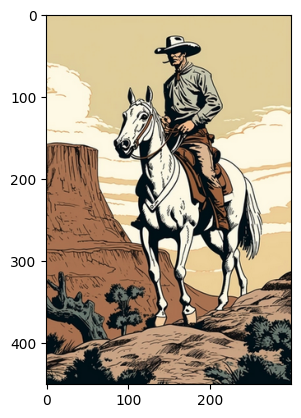

In [73]:
image_path = 'test.png'

# load image
image = load_img(image_path, target_size=(224, 224))

# convert image pixels to numpy array
image = img_to_array(image)

# reshape data for model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

# preprocess image for vgg
image = preprocess_input(image)

# extract features
feature = vgg_model.predict(image, verbose=0)

# predict from the trained model
print("-------Model 1 -------")
y_pred =  predict_caption(model1, feature, tokenizer, max_length)
words = y_pred.split()
words = words[1:-1]
y_pred = " ".join(words)
print(y_pred)
print('\n')
image = Image.open(image_path)
print("-------Model 2 -------")
y_pred =  predict_caption(model2, feature, tokenizer, max_length)
words = y_pred.split()
words = words[1:-1]
y_pred = " ".join(words)
print(y_pred)
print('\n')
image = Image.open(image_path)
plt.imshow(image)

-------Model 1 -------
man in blue shirt is sitting on the ground


-------Model 2 -------
man in blue shirt is sitting on the ground




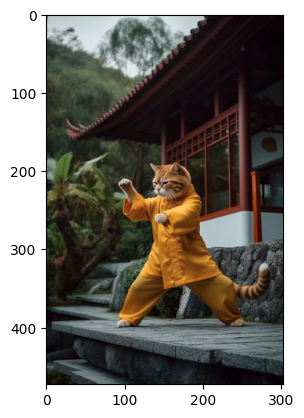

In [74]:
image_path = 'test3.png'

# load image
image = load_img(image_path, target_size=(224, 224))

# convert image pixels to numpy array
image = img_to_array(image)

# reshape data for model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

# preprocess image for vgg
image = preprocess_input(image)

# extract features
feature = vgg_model.predict(image, verbose=0)

# predict from the trained model
print("-------Model 1 -------")
y_pred =  predict_caption(model1, feature, tokenizer, max_length)
words = y_pred.split()
words = words[1:-1]
y_pred = " ".join(words)
print(y_pred)
print('\n')
image = Image.open(image_path)
print("-------Model 2 -------")
y_pred =  predict_caption(model2, feature, tokenizer, max_length)
words = y_pred.split()
words = words[1:-1]
y_pred = " ".join(words)
print(y_pred)
print('\n')
image = Image.open(image_path)
plt.imshow(image)

-------Model 1 -------
dog is jumping over hurdle


-------Model 2 -------
two dogs are playing in the sand




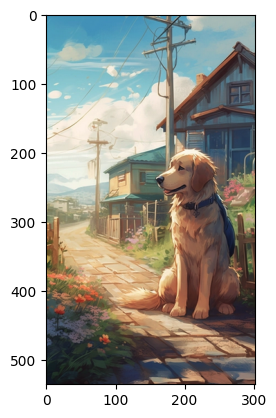

In [75]:
image_path = 'test4.png'

# load image
image = load_img(image_path, target_size=(224, 224))

# convert image pixels to numpy array
image = img_to_array(image)

# reshape data for model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

# preprocess image for vgg
image = preprocess_input(image)

# extract features
feature = vgg_model.predict(image, verbose=0)

# predict from the trained model
print("-------Model 1 -------")
y_pred =  predict_caption(model1, feature, tokenizer, max_length)
words = y_pred.split()
words = words[1:-1]
y_pred = " ".join(words)
print(y_pred)
print('\n')
image = Image.open(image_path)
print("-------Model 2 -------")
y_pred =  predict_caption(model2, feature, tokenizer, max_length)
words = y_pred.split()
words = words[1:-1]
y_pred = " ".join(words)
print(y_pred)
print('\n')
image = Image.open(image_path)
plt.imshow(image)